# IMDB Sentiment Classification — SimpleRNN
Simple RNN model using Keras IMDB dataset (binary sentiment).


In [2]:
!pip install -q numpy pandas matplotlib seaborn scikit-learn nltk



In [3]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix


In [5]:
# keep top 10000 words
VOCAB_SIZE = 10000
MAX_LEN = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=VOCAB_SIZE)
x_train = pad_sequences(x_train, maxlen=MAX_LEN, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=MAX_LEN, padding='post', truncating='post')

print(x_train.shape, x_test.shape)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(25000, 200) (25000, 200)


In [6]:
model = Sequential([
    Embedding(VOCAB_SIZE, 64, input_length=MAX_LEN),
    SimpleRNN(64),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(x_train, y_train, validation_split=0.1, epochs=8, batch_size=128, callbacks=[es])


Epoch 1/8
176/176 ━━━━━━━━━━━━━━━━━━━━ 32s 160ms/step - accuracy: 0.4986 - loss: 0.6970 - val_accuracy: 0.5184 - val_loss: 0.6939
Epoch 2/8
176/176 ━━━━━━━━━━━━━━━━━━━━ 31s 101ms/step - accuracy: 0.5416 - loss: 0.6881 - val_accuracy: 0.5076 - val_loss: 0.6932
Epoch 3/8
176/176 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step - accuracy: 0.5950 - loss: 0.6611 - val_accuracy: 0.5288 - val_loss: 0.7138
Epoch 4/8
176/176 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - accuracy: 0.6806 - loss: 0.5298 - val_accuracy: 0.5072 - val_loss: 0.7383
Epoch 5/8
176/176 ━━━━━━━━━━━━━━━━━━━━ 17s 97ms/step - accuracy: 0.7201 - loss: 0.4506 - val_accuracy: 0.5272 - val_loss: 0.9753


782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.5031 - loss: 0.6951
Test accuracy: 0.5067999958992004
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step
              precision    recall  f1-score   support

           0       0.52      0.23      0.32     12500
           1       0.50      0.78      0.61     12500

    accuracy                           0.51     25000
   macro avg       0.51      0.51      0.47     25000
weighted avg       0.51      0.51      0.47     25000



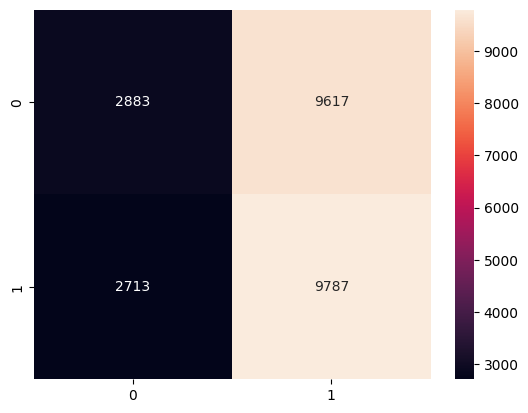

In [8]:
loss, acc = model.evaluate(x_test, y_test)
print("Test accuracy:", acc)

y_pred = (model.predict(x_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d'); plt.show()


In [10]:
model.save('imdb_simple_rnn.h5')
from google.colab import files
files.download('imdb_simple_rnn.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>